# Setup & Import Libraries

### Pada tahap ini, kita mengimpor library yang diperlukan untuk analisis data, preprocessing, dan pembuatan model machine learning:

- `numpy` dan `pandas`: Digunakan untuk manipulasi data.
- `matplotlib` dan `seaborn`: Digunakan untuk visualisasi data.
- `sklearn`: Digunakan untuk preprocessing data dan pembagian dataset.
- `tensorflow.keras`: Digunakan untuk membuat dan melatih model jaringan saraf tiruan.

Selain itu, juga memindai direktori input di platform Kaggle untuk memastikan dataset tersedia.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/maternal-health-risk-data/Maternal Health Risk Data Set.csv


# Data Loading & Exploration
### Dataset dimuat dari file CSV dan dilakukan eksplorasi awal untuk memahami struktur data. Langkah-langkah yang dilakukan:

- Memuat dataset, menampilkan sampel data, deskripsi statistik, dan informasi kolom.
- Memeriksa tipe data kolom untuk memastikan konsistensi.
- Mendapatkan deskripsi statistik dasar seperti rata-rata, nilai maksimum, dan minimum.
- Mengidentifikasi nilai yang hilang di dalam dataset.
- Membuat visualisasi distribusi kelas pada kolom target (`RiskLevel`) menggunakan `countplot`.

In [2]:
df = pd.read_csv('/kaggle/input/maternal-health-risk-data/Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


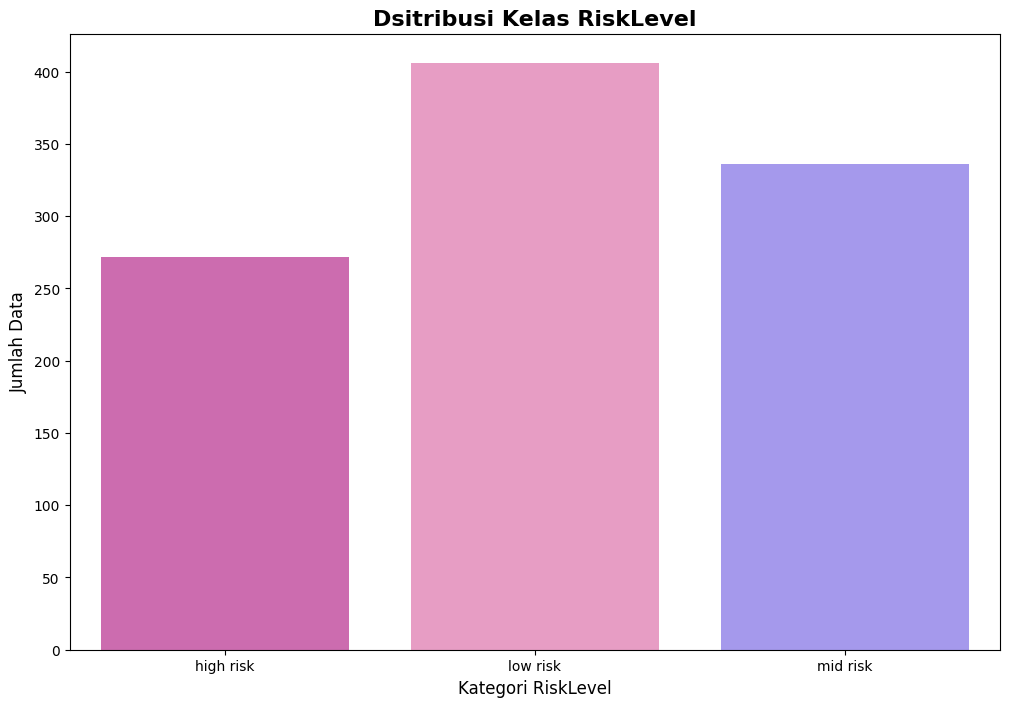

In [6]:
custom_palette = ['#DC5CB5', '#F490C5', '#9B8BFA', '#5CBEE3']  

plt.figure(figsize=(12,8))
sns.countplot(x='RiskLevel', data=df, palette=custom_palette)
plt.title('Dsitribusi Kelas RiskLevel', fontsize=16, fontweight='bold')
plt.xlabel('Kategori RiskLevel', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.show()

# Featur Engineering
### Langkah ini memastikan bahwa data memiliki unit yang konsisten, yang dapat membantu meningkatkan akurasi model:

- Kolom BodyTemp yang awalnya dalam Fahrenheit dikonversi ke Celcius menggunakan rumus konversi suhu.

In [7]:
df['BodyTemp'] = (df['BodyTemp'] - 32) * 5 / 9

In [8]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,36.666667,86,high risk
1,35,140,90,13.0,36.666667,70,high risk
2,29,90,70,8.0,37.777778,80,high risk
3,30,140,85,7.0,36.666667,70,high risk
4,35,120,60,6.1,36.666667,76,low risk


# Data Preprocessing

### Data dibersihkan dan dinormalisasi untuk memastikan siap digunakan dalam model:

- Kolom target RiskLevel yang berbentuk kategori diubah menjadi nilai numerik menggunakan teknik map().
- Fitur numerik pada dataset dinormalisasi menggunakan StandardScaler untuk memastikan data memiliki skala yang seragam.

In [9]:
RiskLevel = {'low risk':0, 
        'mid risk':1, 
        'high risk':2}

# apply using map
df['RiskLevel'] = df['RiskLevel'].map(RiskLevel).astype(float)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,36.666667,86,2.0
1,35,140,90,13.0,36.666667,70,2.0
2,29,90,70,8.0,37.777778,80,2.0
3,30,140,85,7.0,36.666667,70,2.0
4,35,120,60,6.1,36.666667,76,0.0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,36.666667,80,2.0
1010,55,120,90,18.0,36.666667,60,2.0
1011,35,85,60,19.0,36.666667,86,2.0
1012,43,120,90,18.0,36.666667,70,2.0


In [10]:
X = df.drop('RiskLevel',axis=1)
y = df['RiskLevel']

# Train-Test Split

### Dataset dibagi menjadi tiga bagian:

1. Data Latih: Digunakan untuk melatih model.
2. Data Validasi: Digunakan untuk memantau kinerja model selama pelatihan.
3. Data Uji: Digunakan untuk mengukur performa akhir model.

Rasio pembagian yang digunakan adalah:

- 70:30 untuk data latih dan data uji.
- 75:25 untuk data latih dan data validasi dari data sementara (data latih dan uji).

Selain itu, rata-rata (mean) dan standar deviasi (std) dari fitur yang telah dinormalisasi ditampilkan untuk dokumentasi.

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

X_train, X_val, X_test, y_train,y_val,y_test


(array([[ 1.79155565,  1.45702716,  1.6960543 ,  1.90589019, -0.4852155 ,
         -1.0268485 ],
        [ 1.49454961,  1.45702716,  0.97553854,  1.90589019, -0.4852155 ,
          1.94171708],
        [-0.88149869,  0.36976548,  0.25502279, -0.25091417,  2.43298447,
          0.21005383],
        ...,
        [-0.9557502 , -1.26112705, -0.969854  , -0.55468943,  1.70343448,
         -0.53208757],
        [ 2.60832225,  0.91339632,  0.25502279,  1.90589019, -0.4852155 ,
          1.44695615],
        [ 1.34604659,  1.45702716,  0.97553854,  1.90589019, -0.4852155 ,
          1.94171708]]),
 array([[-0.51024114,  0.36976548,  0.97553854, -0.37242428, -0.4852155 ,
         -1.76898989],
        [-0.65874416, -2.07657332, -1.90652448, -0.2812917 , -0.4852155 ,
         -1.76898989],
        [ 0.00951942,  0.36976548,  0.25502279,  0.08323862,  1.70343448,
          0.21005383],
        ...,
        [-1.10425321, -2.02221024, -1.97857606, -0.58506696, -0.4852155 ,
          0.33374406],
  

In [12]:
# Mendapatkan mean dan scale
mean = scaler.mean_
std = scaler.scale_

print("Mean:", mean)
print("Std (scale):", std)

Mean: [ 29.87179487 113.19822485  76.46055227   8.72598619  37.03616042
  74.30177515]
Std (scale): [13.46773972 18.39483561 13.878947    3.29190729  0.76150444  8.08471278]


In [13]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((709, 6), (228, 6), (77, 6), (709,), (228,), (77,))

# Model Training

## Model jaringan saraf dibangun menggunakan Keras dengan struktur berikut:

- Layer Input: Lapisan awal yang menerima input fitur.
- Hidden Layers: Terdiri dari beberapa lapisan dengan fungsi aktivasi ReLU dan lapisan Dropout untuk mencegah overfitting.
- Layer Output: Lapisan terakhir dengan fungsi aktivasi softmax untuk klasifikasi tiga kelas (`Low Risk`,` Mid Risk`, `High Risk`).

Model dikompilasi menggunakan optimasi Adam dan fungsi loss `sparse_categorical_crossentropy`. Model dilatih selama 100 epoch dengan data validasi digunakan untuk memantau performa.

In [14]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3217 - loss: 1.1552 - val_accuracy: 0.5570 - val_loss: 1.0706
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4325 - loss: 1.0698 - val_accuracy: 0.5351 - val_loss: 1.0273
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4854 - loss: 1.0454 - val_accuracy: 0.5702 - val_loss: 0.9731
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5686 - loss: 0.9530 - val_accuracy: 0.5526 - val_loss: 0.9102
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5599 - loss: 0.9281 - val_accuracy: 0.5702 - val_loss: 0.8593
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5777 - loss: 0.8661 - val_accuracy: 0.5789 - val_loss: 0.8193
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5723 - loss: 0.8778 - val_accuracy: 0.5833 - val_loss: 0.7903
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6037 - loss: 0.8209 - val_accuracy: 0.5965 - val_loss: 0.

# Model Evaluation

## Setelah pelatihan selesai, model dievaluasi pada data validasi dan data uji. Metrik evaluasi meliputi:

- Loss: Mengukur seberapa jauh prediksi model dari target sebenarnya.
- Accuracy: Mengukur persentase prediksi yang benar.

Selain itu, grafik dibuat untuk memvisualisasikan perubahan loss dan accuracy selama proses pelatihan, baik pada data latih maupun validasi.

Kemudian Model yang telah dilatih diuji untuk membuat prediksi pada data baru.

In [15]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - loss: 0.6720 
Validation Loss: 0.6550797820091248
Validation Accuracy: 0.6754385828971863
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6567 - loss: 0.7257 
Test Loss: 0.7264341115951538
Test Accuracy: 0.649350643157959


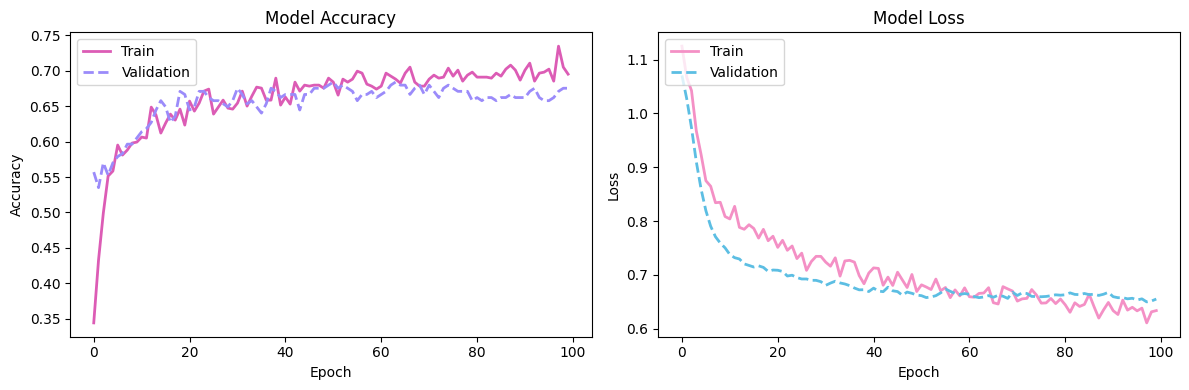

In [16]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)


plt.plot(history.history['accuracy'], label='Training Accuracy', color='#DC5CB5', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#9B8BFA', linestyle='--', linewidth=2)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='#F490C5', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='#5CBEE3', linestyle='--', linewidth=2)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [17]:
data_baru_1 = np.array([[32,120,65,6.0,38.333333,76]])  # labelnya 1

data_baru_scaled = scaler.transform(data_baru_1)

predict_data_baru = model.predict(data_baru_scaled)

prediksi_index = np.argmax(predict_data_baru)

label_mapping = {0: 'Normal', 1: 'Mid Risk', 2: 'High Risk'}
prediksi_label = label_mapping[prediksi_index]

print(f"Prediksi kelas: {prediksi_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Prediksi kelas: Mid Risk


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Model Saving

Model yang telah dilatih disimpan dalam format .h5, sehingga dapat digunakan kembali di masa depan tanpa perlu melatih ulang. 

In [18]:
model.save('/kaggle/working/model 2.h5')